In [2]:
from math import log10
from random import shuffle

from layers.loading.filtering_book_loader import FilteringBookLoader
from layers.segmentation.block_segmenter import BlockSegmenter
from layers.segmentation.paragraph_segmenter import ParagraphSegmenter

In [3]:
loader = FilteringBookLoader([])
books = loader.read('data/')

In [4]:
books = list(books)

In [5]:
paragraph_splitter = ParagraphSegmenter()

In [6]:
authors = map(lambda book: book.author, books)
titles = map(lambda book: book.title, books)
series = map(lambda book: book.series, books)
lengths = map(lambda book: len(book.text), books)
paragraphs = map(lambda book: paragraph_splitter.process(book.text), books)
# paragraph_lens = map(lambda paragraph: len(paragraph), paragraphs)
# paragraphs = [paragraph for book in paragraphs for paragraph in book]

In [7]:
paragraphs1 = list(paragraphs)

In [11]:
def group_dialogues(paragraphs: list[str]) -> list[str]:
    result = [""]
    for paragraph in paragraphs:
        if result[-1].startswith('-') and paragraph.startswith('-'):
            result[-1] += '\n' + paragraph
        else:
            result.append(paragraph)
        
    return result

In [14]:
group_dialogues(list(map(lambda x: x.text, paragraphs1[0])))

['',
 'Сергей Лукьяненко',
 'Джамп',
 'Звезды - холодные игрушки',
 'Пролог',
 'Океан не помнил обид. Подобно небу, он верил в свободу, подобно небу - не терпел преград. Я стоял на мокром песке, волны лизали ноги, и так легко было поверить, что чужая звезда в небе - мое Солнце, а соленая вода - древняя колыбель человечества.',
 'Вот только линия берега - слишком ровная. Прямая, как горизонт, и такая же фальшивая. Если пойти вдоль берега, то ничего не изменится: по правую руку потянутся низкие, словно подстриженные, рощицы, по левую - будет шипеть прибой. Лишь песок под ногами изменит цвет, из желтого станет белым, из белого - розовым, из розового - черным, и - обратно. Полоска пляжа неощутимо для глаз повернет вправо, ее покроет снег, потом снова потянется песок, и когда-нибудь, очень не скоро, я вернусь к этой же точке, где волны все так же будут ласкать берег',
 'Один человек - уже слишком много, чтобы изменить мир. Я сделал шаг, и вода с шипением заполнила мои следы. Мир - уже слишк

In [19]:
para = [paragraph.text for book in paragraphs1 for paragraph in book]
para.sort(key=lambda parag: len(parag))

In [22]:
para1 = group_dialogues(para)

In [28]:
sum(map(lambda x: len(x), para1)) / len(para1), sum(map(lambda x: len(x), para)) / len(para)

(250.02058450120325, 169.46441430340488)

In [32]:
len(list(filter(lambda x: len(x) < 100, para1))), len(list(filter(lambda x: len(x) < 100, para))) 

(1892243, 3877964)

In [38]:
from random import shuffle
l1 = list(filter(lambda x: len(x) < 20, para1))
shuffle(l1)
l1[:100]

['Он убегающую догнал',
 'Потом отец сказал.',
 '3.',
 'Я проронил:',
 'А потом отдыхают.',
 '3',
 'Улей.',
 '* * *',
 'УОЛДЕР РЫЖИЙ.',
 '- Твои тролли?',
 'Ру засмеялся:',
 '"Сделала что?"',
 '* * *',
 'КРОВЬ ПЬЮТ РУКАМИ',
 'Блэк кивнул ему.',
 'ВЕЛЕНИЯ СОВЕСТИ',
 'Чудакулли вздохнул.',
 'Эрик нервно ждал.',
 'ГЛАВА 9',
 'Меч в камне.',
 'Виктор вздохнул.',
 'Да.',
 'Нет.',
 '* * *',
 'Глава 2',
 'Грюм усмехнулся.',
 'Штефан спросил:',
 '2',
 'Радиопьеса',
 '* * *',
 'Тайная цель.',
 'Томас хмыкнул.',
 '4',
 'МЕЙСТЕР МАЛЛИН.',
 'Губы Блисс сжались.',
 'Глава 5.',
 '* * *',
 'Хозяин',
 'Неспы против Архов.',
 'Роберта улыбнулась.',
 'Он кивнул.',
 '- Сам знаешь что.',
 '- Да, Вагон - труп.',
 '14.',
 'Обе рассмеялись.',
 'Дэвис нахмурился:',
 '4',
 'Там было пусто.',
 'Эпинэ',
 'Пещеры Каппадокии',
 'И надежда умереть',
 'Время дроу.',
 'Почти всё.',
 'Пантана. Убежище',
 '- И ты заплатила?',
 'Хесус Льюис,',
 'Народная мудрость.',
 'РАЗГОВОР НА БАШНЕ',
 '3',
 'Я покачал головой.',
 'П

In [61]:
from layers.segmentation.block_segmenter import BlockSegmenter
block_segmenter = BlockSegmenter(block_max_length=4000)
paragraphs_block = map(lambda book: block_segmenter.process(book.text), books)
paragraphs_block = [para.text for book in paragraphs_block for para in book]

In [62]:
sum(map(lambda x: len(x), paragraphs_block)) / len(paragraphs_block)

3670.0207271575873

In [63]:
import matplotlib.pyplot as plt

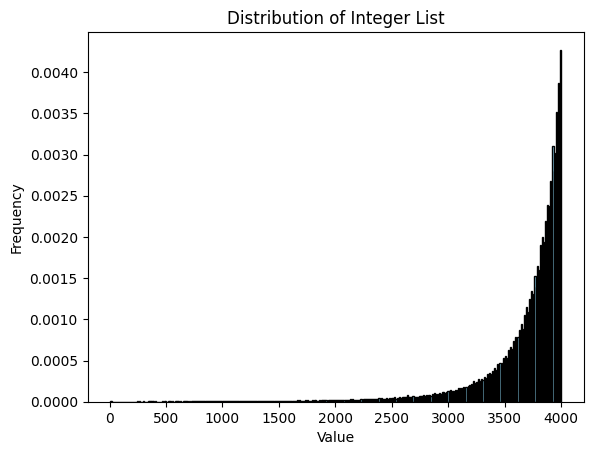

In [64]:
paralen = list(map(lambda book: len(book), paragraphs_block))
paralen = list(filter(lambda book: book, paralen))
plt.hist(paralen, density=True, bins='auto', color='skyblue', edgecolor='black')
plt.title("Distribution of Integer List")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

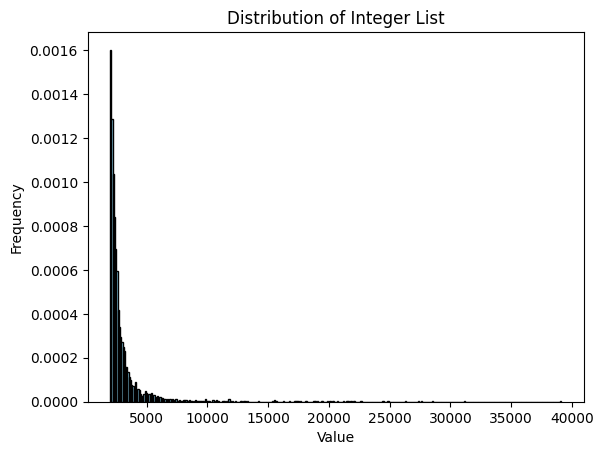

In [60]:
from math import log
paralen = list(map(lambda book: len(book), para))
paralen = list(filter(lambda book: book > 2000, paralen))
plt.hist(paralen, density=True, bins='auto', color='skyblue', edgecolor='black')
plt.title("Distribution of Integer List")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [31]:
data = {
    'authors': authors,
    'titles': titles,
    'series': series,
    'lengths': lengths,
    'paragraphs': paragraphs
}

In [20]:
import polars as pl

In [32]:
book_df = pl.dataframe.DataFrame(data)

In [37]:
book_df = book_df.with_columns(
    (pl.col('lengths') / pl.col('paragraphs')).alias('avg_length'),
)

In [44]:
book_df.select(pl.col('lengths').sum() / pl.col('paragraphs').sum())

lengths
f64
170.561363
